In [1]:
#Librarires import
import csv
import random
import math

# 1.Load Data


The first thing we need to do is load our data file. 


In [2]:
#replace with the text file path
#make sure that it ends with the extension .txt
with open(r"/content/iris.data.txt", 'r') as csvfile:

    lines = csv.reader(csvfile, delimiter=',')
   
    for row in lines :

        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

Next we need to split the data into a training dataset.

We defined the following function to perform both :
1.   reading data
2.   splitting data into train and test



**Your Task :**

Replace the #CODE HERE with your code to complete the function.

**hint** : make sure the if is in the same level as the second for.


In [7]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):

  #reading a text file
  with open(filename, 'r') as csvfile:
    
    lines = csv.reader(csvfile) 

    #put the file in a list of lists
    #each sublist is a line!
    dataset = list(lines) 

    #iterate over all rows
    for x in range(len(dataset)-1): 
      #iterate iver the 4 first numeric columns
      for y in range(4):
        
        #convert the measures from string to float
        dataset[x][y] = float(dataset[x][y])
      
      #append the rows to a list for trainingSet
      #random.random returns a float between 0 and 1 suppose it is 0.
      if random.random() < split: 
        trainingSet.append(dataset[x])
      ##append the rows to a list for testSet
      else: 
        testSet.append(dataset[x])


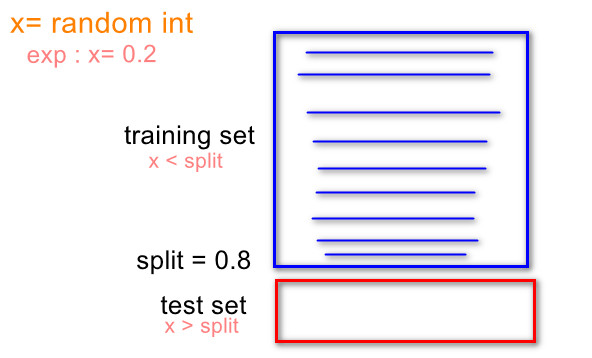

We can test this function out with our iris dataset, as follows:


In [17]:
trainingSet=[]

testSet=[]

loadDataset('/content/iris.data.txt', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

Train: 101
Test: 48


# 2.Similarity

- To make predictions we need to calculate the **similarity** between any two given data instances. This is needed so that we can locate the k most similar data instances in the training dataset for a given member of the test dataset and in turn, make a prediction.

- Given that all four flower measurements are numeric and have the same units, we can directly use the **Euclidean distance measure.**

- Additionally, we want to control which fields to include in the distance calculation. Specifically, we only want to include the first 4 attributes. One approach is to limit the Euclidean distance to a fixed length, ignoring the final dimension.

Putting all of this together, you have to define the euclidean distance


**hint** 
**You can use the math.sqrt and pow**

<img src='https://www.saedsayad.com/images/KNN_similarity.png'>

In [21]:
#use math.sqrt and pow
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

We can test this function with some sample data, as follows:


In [22]:
data1 = [2, 2, 2, 2]
data2 = [4, 4, 4, 4]
data3 = [9, 9, 9, 9]

distance1 = euclideanDistance(data1, data2, 4)
distance2 = euclideanDistance(data1, data3, 4)

print ('Distance 1: ' + repr(distance1))
print ('Distance 2: ' + repr(distance2))

Distance 1: 4.0
Distance 2: 14.0


# 3.Neighbors 

Now that we have a similarity measure, we can use it to collect the k most similar instances for a given unseen instance.

This is a straightforward process of calculating the distance for all instances and selecting a subset with the smallest distance values.

Below is the getNeighbors function that returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function)

In [23]:
import operator

def getNeighbors(trainingSet, testInstance, k):
  
  distances = []
  #lenght is the number of numeric features
  length = len(testInstance)-1

  for x in range(len(trainingSet)):

    dist = euclideanDistance(testInstance, trainingSet[x], length)

    distances.append((trainingSet[x], dist))

    distances.sort(key=operator.itemgetter(1))

    neighbors = []

  for x in range(k):

    neighbors.append(distances[x][0])

  return neighbors

We can test out this function as follows:


In [24]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

#k= number of neighbors
k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


# 4.  Response

Once we have located the most similar neighbors for a test instance, the next task is to devise a predicted response based on those neighbors.

We can do this by allowing each neighbor to vote for their class attribute, and take the majority vote as the prediction.

Below provides a function for getting the majority voted response from a number of neighbors. It assumes the class is the last attribute for each neighbor.

In [25]:
import operator

def getResponse(neighbors):
  #create a dictionnary containing {class : number of votes}
  classVotes = {}

  for x in range(len(neighbors)):

    #extract the class 
    response = neighbors[x][-1] #complete with appropriate number

    #increment the number of votes if the class is already in classVotes
    if response in classVotes:
      classVotes[response] += 1
    
    #else just intiliaze the class with 1 
    else :
      classVotes[response] = 1
      #sort the values of classvotes
  sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
      
  #return dictionnary and the class with the highest votes (sortedVotes[0][0])
  return classVotes,sortedVotes[0][0]


We can test out this function with some test neighbors, as follows:


In [26]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

classVotes,response = getResponse(neighbors)

print('classVotes : ',classVotes)
print('response :',response)

classVotes :  {'a': 2, 'b': 1}
response : a


This approach returns one response in the case of a draw, but you could handle such cases in a specific way, such as returning no response or selecting an unbiased random response.


# 5. Accuracy

We have all of the pieces of the kNN algorithm in place. An important remaining concern is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made, called the classification accuracy.

Below is the getAccuracy function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications.

In [43]:
def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(len(testSet)):
      if testSet[x][-1] == predictions[x][-1]:
        correct+=1

  return (correct/float(len(testSet))) * 100.0

We can test this function with a test dataset and predictions, as follows:


In [31]:
#testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

#predictions = ['a', 'a', 'a']

#accuracy = getAccuracy(testSet, predictions)

#print(accuracy)

# 6. Main

We now have defined all the functions of the KNN algorithm. Now call them and put them all in one main function 

Following is a Hello World example of how to create the main function in python : 


```
def main():
    print("Hello World!")

if __name__ == "__main__":
    main()

```



In [44]:
  def main():
      #initialize trainSet , testSet , k  and predictions
      #CODE HERE
      trainingSet=[]
      testSet=[]
      split = 0.67
      k=5
      predictions=[]
      #call the loaddatest function
      loadDataset('/content/iris.data.txt', split, trainingSet, testSet)

      for x in range(len(testSet)):
        #get neighbors
          neighbors = getNeighbors(trainingSet, testSet[x], k)
          #get response
          result = getResponse(neighbors)
          #append each result in predictions
          predictions.append(result)
          print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
      accuracy = getAccuracy(testSet, predictions)
      print(accuracy)
      print(testSet)
      print(predictions)
  main()

> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-setosa': 5}, 'Iris-setosa'), actual='Iris-setosa'
> predicted=({'Iris-

# 7. Another distance metric

 In this part, you are asked to define another distance metric instead of euclidean distance


<img src='https://www.saedsayad.com/images/KNN_similarity.png'>